# exp_3_dession_tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv("C:\\Users\\ishuk\\Desktop\\sem 6\\lab\\ml_lab_sem_6\\exp_3\\Social_Network_Ads.csv")

In [4]:
print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
dataset.shape

(400, 5)

In [8]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
a=dataset['Purchased'].value_counts()
print(a)
fig = px.pie(dataset, values=a.values,names=a.index)
fig.show()

0    257
1    143
Name: Purchased, dtype: int64


In [9]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:, [2,3]].values
# Extracting dependent variable:
y = dataset.iloc[:, 4].values

In [10]:
print(X)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [12]:
# Feature Scaling
#x-u/sigma
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
print(X_train)

[[ 0.77063564 -1.37090753]
 [-0.95681661 -0.74731782]
 [ 1.25048349 -1.37090753]
 [ 0.09884866  1.09375655]
 [-0.28502962 -0.56914934]
 [-1.14875575  0.49986159]
 [-1.05278618  0.44047209]
 [-1.14875575  0.3216931 ]
 [ 1.5383922   1.15314605]
 [-0.95681661 -0.3018966 ]
 [ 2.01824005 -0.80670732]
 [ 0.09884866 -0.80670732]
 [ 2.01824005  0.55925109]
 [ 0.86660521 -0.53945459]
 [-0.28502962  0.11382987]
 [-0.86084704  0.17321936]
 [ 0.2907878  -0.27220186]
 [-0.28502962 -0.27220186]
 [ 0.38675737  2.37063071]
 [ 1.73033134  1.89551474]
 [ 0.19481823 -0.24250711]
 [ 1.05854435 -1.22243379]
 [-0.18906005 -0.56914934]
 [ 1.44242263  0.3810826 ]
 [-0.28502962 -1.40060228]
 [ 0.96257478 -1.07396005]
 [ 1.82630091 -0.27220186]
 [-0.28502962  0.55925109]
 [-1.14875575 -1.60846551]
 [-1.43666446 -1.45999177]
 [-0.09309048 -0.50975984]
 [-1.24472532  0.29199835]
 [-0.18906005  1.68765151]
 [ 0.96257478 -1.01457056]
 [-0.86084704  0.3216931 ]
 [-1.53263403 -1.51938127]
 [ 1.73033134 -0.27220186]
 

In [14]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
#classifier = DecisionTreeClassifier(criterion = 'gini',max_depth=4, random_state = 42)
#classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1
 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1]


In [16]:
y_pred.sum()

30

In [18]:
y_pred.shape

(100,)

In [19]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 0.9967
Test set score: 0.8200


[Text(0.4945652173913043, 0.9642857142857143, 'X[0] <= 0.627\nentropy = 0.945\nsamples = 300\nvalue = [191, 109]'),
 Text(0.29347826086956524, 0.8928571428571429, 'X[1] <= 0.604\nentropy = 0.661\nsamples = 216\nvalue = [179, 37]'),
 Text(0.17391304347826086, 0.8214285714285714, 'X[0] <= -0.141\nentropy = 0.239\nsamples = 178\nvalue = [171, 7]'),
 Text(0.15217391304347827, 0.75, 'entropy = 0.0\nsamples = 118\nvalue = [118, 0]'),
 Text(0.1956521739130435, 0.75, 'X[1] <= 0.04\nentropy = 0.52\nsamples = 60\nvalue = [53, 7]'),
 Text(0.17391304347826086, 0.6785714285714286, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.21739130434782608, 0.6785714285714286, 'X[1] <= 0.426\nentropy = 0.855\nsamples = 25\nvalue = [18, 7]'),
 Text(0.1956521739130435, 0.6071428571428571, 'X[0] <= 0.339\nentropy = 0.811\nsamples = 24\nvalue = [18, 6]'),
 Text(0.15217391304347827, 0.5357142857142857, 'X[0] <= 0.243\nentropy = 0.702\nsamples = 21\nvalue = [17, 4]'),
 Text(0.13043478260869565, 0.464285714

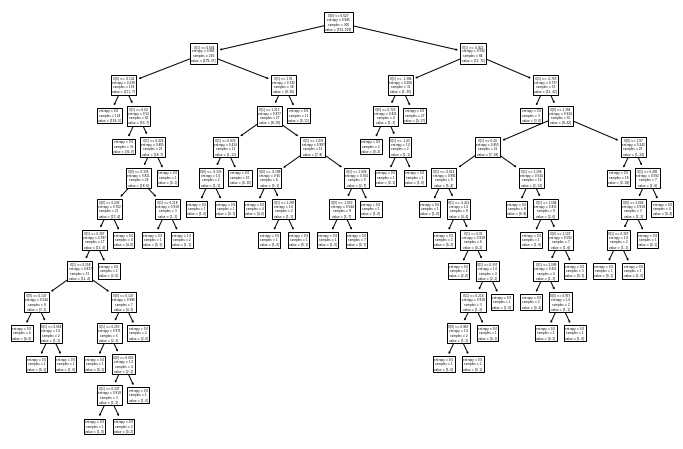

In [21]:
import graphviz 
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(classifier.fit(X_train, y_train))

In [25]:
dot_data = tree.export_graphviz(classifier.fit(X_train,y_train), out_file=None, filled=True, rounded=True)  
graph = graphviz.Source(dot_data) 

print(graph)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[0] <= 0.627\nentropy = 0.945\nsamples = 300\nvalue = [191, 109]", fillcolor="#f4c9aa"] ;
1 [label="X[1] <= 0.604\nentropy = 0.661\nsamples = 216\nvalue = [179, 37]", fillcolor="#ea9b62"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= -0.141\nentropy = 0.239\nsamples = 178\nvalue = [171, 7]", fillcolor="#e68641"] ;
1 -> 2 ;
3 [label="entropy = 0.0\nsamples = 118\nvalue = [118, 0]", fillcolor="#e58139"] ;
2 -> 3 ;
4 [label="X[1] <= 0.04\nentropy = 0.52\nsamples = 60\nvalue = [53, 7]", fillcolor="#e89253"] ;
2 -> 4 ;
5 [label="entropy = 0.0\nsamples = 35\nvalue = [35, 0]", fillcolor="#e58139"] ;
4 -> 5 ;
6 [label="X[1] <= 0.426\nentropy = 0.855\nsamples = 25\nvalue = [18, 7]", fillcolor="#efb286"] ;
4 -> 6 ;
7 [label="X[0] <= 0.339\nentropy = 0.811\nsamples = 24\nvalue = [18, 6]", fillcolor="#eeab7b"] ;
6 -> 7 ;
8 [lab

In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
#print(cm)
cm_dispay=ConfusionMatrixDisplay(cm).plot()

Confusion matrix: 


In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))


Accuracy: 82.00


In [28]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.2f' % (precision))

Precision: 0.77


In [29]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall))

Recall: 0.676
